# Smart Parking Experiment

## Import list

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import os

C:\Users\KSY\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\KSY\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Car In/Out using sensors : Orientation, Magno

#### Method Definition

In [2]:
def read_data(state_num, case_num):
    base_dir = os.getcwd()
    test_data = np.loadtxt("..\\..\\..\\sensor_data\\car2\\case"+str(state_num)+"_" +str(case_num)+ '.csv', delimiter=',', dtype=np.float32)
    return test_data

def read_result(state_num, case_num):
    base_dir = os.getcwd()
    test_data = np.loadtxt("..\\..\\..\\sensor_data\\car2\\result"+str(state_num)+"_" +str(case_num)+ '.csv', delimiter=',', dtype=np.float32)
    return test_data

#### Data Reading

In [3]:
text1_title = "Car(Out → In)"
text2_title = "Car(In → Out)"

state_num = 1
case_num  = 10
test1_test_data = read_data(state_num, case_num)

state_num = 6
case_num  = 9
test2_test_data = read_data(state_num, case_num)

In [4]:
num = 5
test1_test_data = np.loadtxt("..\\..\\..\\sensor_data\\car3\\caradd"+"_" + str(num) + ".csv", delimiter=',', dtype=np.float32)         

## 1. Sensor data

#### 1) car (out → in)

In [5]:
test1_x = test1_test_data[:, 0:1]

# title = "Orientation sensor "
# y1 = test_data[:, 4:5]
# test1_y2 = test1_test_data[:, 5:6]
# y3 = test_data[:, 6:7]

# title = "Magno sensor "
test1_y1 = test1_test_data[:, 10:11]
# y2 = test_data[:, 11:12]
# y3 = test_data[:, 12:13]

#### 2) car (in → out)

In [6]:
test2_x = test2_test_data[:, 0:1]
test2_y1 = test2_test_data[:, 10:11]

## 2. Generate Graph

#### 1) car (out → in)

In [8]:
test1_x.shape

(2201, 1)

In [9]:
tmp = test1_x[:2200,0]

In [10]:
tmp = tmp.reshape(2200,1)

In [11]:
tmp.shape

(2200, 1)

C:\Users\KSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


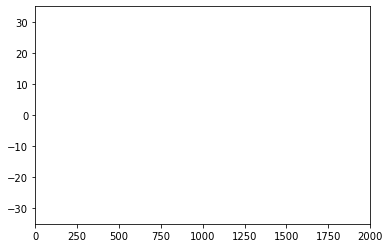

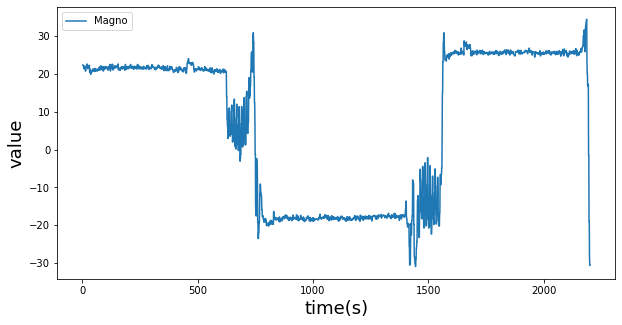

In [12]:
plt.axis([0, 2000, -35, 35])
# title = "Magnetic sensor "
state = "(Out → In → Out)"
# plt.title(title+state)
x = test1_x
y1 =test1_y1
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y1, label="Magno")

ax = fig.add_subplot(111)
ax.grid(False)

# plt.grid(5)
plt.legend()
plt.xlabel("time(s)", fontsize=18)
plt.ylabel("value", fontsize=18)

file_name = "graph00.svg"
plt.savefig(file_name)

plt.show()

In [13]:
tmp_x = test1_x[:2100,0]
tmp_x = tmp_x.reshape(2100,1)
tmp_x.shape

tmp_y = test1_y1[:2100,0]
tmp_y = tmp_y.reshape(2100,1)
tmp_y.shape

(2100, 1)

C:\Users\KSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


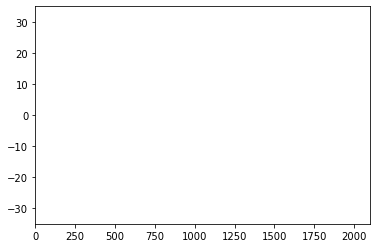

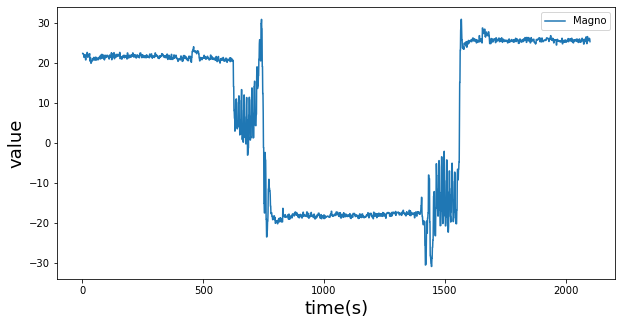

In [14]:
plt.axis([0, 2100, -35, 35])
# title = "Magnetic sensor "
state = "(Out → In → Out)"
# plt.title(title+state)
x = tmp_x
y1 = tmp_y
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y1, label="Magno")

ax = fig.add_subplot(111)
ax.grid(False)

# plt.grid(5)
plt.legend()
plt.xlabel("time(s)", fontsize=18)
plt.ylabel("value", fontsize=18)

file_name = "graph01.svg"
plt.savefig(file_name)

plt.show()

#### 2) car (in → out)

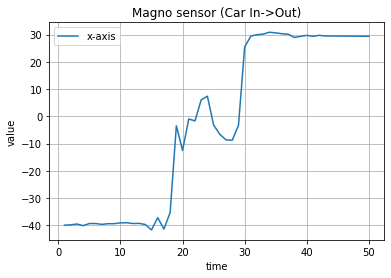

In [17]:
# plt.axis([0, 60, -50,50])
title = "Magno sensor "
state = "(Car In->Out)"
plt.title(title+state)
x = test2_x
y1 =test2_y1
plt.plot(x, y1, label="x-axis")
# plt.plot(x, y2, label="y-axis")
# plt.plot(x, y3, label="z-axis")

plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("value")

file_name = "graph03.png"
plt.savefig(file_name)

plt.show()

#### (3) CNN model

* Input data Preprocessing

In [18]:
state_num = 1
case_num  = 2
test1_test_data = read_data(state_num, case_num)

state_num = 6
case_num  = 7
test2_test_data = read_data(state_num, case_num)

In [19]:
begin = 0
end   = 50

# time
test1_x = test1_test_data[begin:end, 0:1]

# # Orientation
# test1_ori = test1_test_data[begin:end, 5:6]

# Magnetic
test1_magno = test1_test_data[begin:end, 10:11]

In [20]:
print(test1_x.shape)
# print(test1_ori.shape)
print(test1_magno.shape)

(50, 1)
(50, 1)


In [26]:
test1_magno.shape

(50, 1)

In [27]:
def input_data_preprocessing(test_x, test_magno, filter, begin, end):
    val = test_magno[begin : end]
    val = np.ravel(val, order = 'C')
    val = val.reshape(1, filter)
    return val

In [28]:
test1_x.shape

(50, 1)

In [29]:
test1_magno.shape

(50, 1)

In [30]:
filter = 5
def merge_data(test_x, test_magno, filter):
    tmp = input_data_preprocessing(test_x, test1_magno, filter, 0, 5)
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter,  5, 10)])
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter, 10, 15)])
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter, 15, 20)])
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter, 20, 25)])
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter, 25, 30)])
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter, 30, 35)])
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter, 35, 40)])
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter, 40, 45)])
    tmp = np.vstack([tmp, input_data_preprocessing(test_x, test_magno, filter, 45, 50)])
    
    return tmp

In [31]:
state_num = 1
case_num  = 1

def divide_sensor_input(state_num, case_num):
    test1_test_data = read_data(state_num, case_num)

    test1_x = test1_test_data[:, 0:1]
    test1_y1 = test1_test_data[:, 10:11]
    
    return test1_x, test1_y1

def divide_sensor_output(state_num, case_num):
    test1_test_data = read_result(state_num, case_num)
    result = test1_test_data[:, 0:1]
    
    return result

In [32]:
_,file_1_x = divide_sensor_input(1,1)
_,file_2_x = divide_sensor_input(1,2)
_,file_3_x = divide_sensor_input(1,3)
_,file_4_x = divide_sensor_input(1,4)
_,file_5_x = divide_sensor_input(1,5)
_,file_6_x = divide_sensor_input(1,6)
_,file_7_x = divide_sensor_input(1,7)
_,file_8_x = divide_sensor_input(1,8)
_,file_9_x = divide_sensor_input(1,9)
_,file_10_x = divide_sensor_input(1,10)

input_1_x = merge_data(test1_x, file_1_x, filter)
input_2_x = merge_data(test1_x, file_2_x, filter)
input_3_x = merge_data(test1_x, file_3_x, filter)
input_4_x = merge_data(test1_x, file_4_x, filter)
input_5_x = merge_data(test1_x, file_5_x, filter)
input_6_x = merge_data(test1_x, file_6_x, filter)
input_7_x = merge_data(test1_x, file_7_x, filter)
input_8_x = merge_data(test1_x, file_8_x, filter)
input_9_x = merge_data(test1_x, file_9_x, filter)
input_10_x = merge_data(test1_x, file_10_x, filter)

In [33]:
file_1_x.shape

(50, 1)

In [34]:
test1_x.shape

(50, 1)

In [35]:
input_1_x

array([[  7.5      ,   8.76     ,   8.5199995,   7.2599998,   7.3799996],
       [  2.34     ,   4.44     ,  -1.56     ,   4.44     ,  -1.56     ],
       [  4.44     ,  -1.56     ,  -9.66     ,  14.04     ,  35.88     ],
       [ -1.26     , -16.26     , -32.219997 , -28.74     , -33.48     ],
       [-34.98     , -35.579998 , -35.52     , -35.34     , -35.399998 ],
       [-35.219997 , -35.399998 , -34.68     , -35.1      , -34.62     ],
       [-35.399998 , -34.98     , -35.219997 , -35.76     , -35.28     ],
       [-35.82     , -35.399998 , -35.219997 , -35.88     , -33.       ],
       [-34.02     , -34.079998 , -34.98     , -35.64     , -35.76     ],
       [-37.02     , -37.41     , -38.034    , -38.658    , -39.282    ]],
      dtype=float32)

In [36]:
input_1_x.shape

(10, 5)

In [37]:
tmp = input_1_x
tmp = np.vstack([tmp, input_2_x])
tmp = np.vstack([tmp, input_3_x])
tmp = np.vstack([tmp, input_4_x])
tmp = np.vstack([tmp, input_5_x])
tmp = np.vstack([tmp, input_6_x])
tmp = np.vstack([tmp, input_7_x])
tmp = np.vstack([tmp, input_8_x])
tmp = np.vstack([tmp, input_9_x])
tmp = np.vstack([tmp, input_10_x])

In [38]:
tmp.shape

(100, 5)

In [39]:
input_data = tmp

In [40]:
file_1_y = divide_sensor_output(6,1)
file_2_y = divide_sensor_output(6,2)
file_3_y = divide_sensor_output(6,3)
file_4_y = divide_sensor_output(6,4)
file_5_y = divide_sensor_output(6,5)
file_6_y = divide_sensor_output(6,6)
file_7_y = divide_sensor_output(6,7)
file_8_y = divide_sensor_output(6,8)
file_9_y = divide_sensor_output(6,9)
file_10_y = divide_sensor_output(6,10)

In [41]:
file_1_y.shape

(10, 1)

In [42]:
tmp = file_1_y
tmp = np.vstack([tmp, file_2_y])
tmp = np.vstack([tmp, file_3_y])
tmp = np.vstack([tmp, file_4_y])
tmp = np.vstack([tmp, file_5_y])
tmp = np.vstack([tmp, file_6_y])
tmp = np.vstack([tmp, file_7_y])
tmp = np.vstack([tmp, file_8_y])
tmp = np.vstack([tmp, file_9_y])
tmp = np.vstack([tmp, file_10_y])

In [43]:
tmp.shape

(100, 1)

In [44]:
output_data = tmp

In [45]:
input_data.shape

(100, 5)

In [46]:
output_data.shape

(100, 1)

In [47]:
x_data, y_data = input_data, output_data

In [48]:
x_data.shape

(100, 5)

In [49]:
y_data.shape

(100, 1)

In [50]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import MaxPooling1D


x_data, y_data = input_data, output_data

x_data = x_data.reshape(100, 5, 1)  #넘파이행렬로 변환 : 행, 열, 1차원
#y_data = y_data.reshape(8995,51,1)
model = Sequential()
model.add(Conv1D(128,3,activation='sigmoid', input_shape = (5,1), padding = 'same', strides = 1))
#필터갯수,필터크기,활성함수,(입력갯수=열,행), 패딩:same(입,출력 크기 동일)/valid(패딩x),stride(건너뛰기)
# model.add(Conv1D(128,3,activation='sigmoid'))
# model.add(MaxPooling1D(3))  #3칸마다 가장 큰 찾기
# model.add(Conv1D(64,3,activation='sigmoid'))
# model.add(Conv1D(64,3,activation='sigmoid'))
model.add(GlobalAveragePooling1D()) #각 차원마다 평균값 도출
model.add(Dropout(0.5)) #비활성화(0.1), 활성화(0.9)
model.add(Dense(1, activation = 'sigmoid')) #신경망비슷

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.fit(x_data, y_data, batch_size = 100, epochs = 3000)

Using TensorFlow backend.


Epoch 1/3000
100/100 [==============================] - 0s 1ms/step - loss: 0.9588 - accuracy: 0.3400
Epoch 2/3000
100/100 [==============================] - 0s 30us/step - loss: 0.8290 - accuracy: 0.5100
Epoch 3/3000
100/100 [==============================] - 0s 30us/step - loss: 0.6852 - accuracy: 0.6100
Epoch 4/3000
100/100 [==============================] - 0s 20us/step - loss: 0.7478 - accuracy: 0.5200
Epoch 5/3000
100/100 [==============================] - 0s 20us/step - loss: 0.6364 - accuracy: 0.6700
Epoch 6/3000
100/100 [==============================] - 0s 30us/step - loss: 0.6297 - accuracy: 0.6600
Epoch 7/3000
100/100 [==============================] - 0s 40us/step - loss: 0.6152 - accuracy: 0.6800
Epoch 8/3000
100/100 [==============================] - 0s 30us/step - loss: 0.5680 - accuracy: 0.7000
Epoch 9/3000
100/100 [==============================] - 0s 20us/step - loss: 0.4999 - accuracy: 0.7000
Epoch 10/3000
100/100 [==============================] - 0s 30us/step - lo

Epoch 80/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3733 - accuracy: 0.8200
Epoch 81/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3627 - accuracy: 0.8100
Epoch 82/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3716 - accuracy: 0.8200
Epoch 83/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3543 - accuracy: 0.8500
Epoch 84/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3923 - accuracy: 0.8100
Epoch 85/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3563 - accuracy: 0.8700
Epoch 86/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3659 - accuracy: 0.8000
Epoch 87/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3664 - accuracy: 0.8300
Epoch 88/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3961 - accuracy: 0.8000
Epoch 89/3000
100/100 [==============================] - 0s 20us

Epoch 159/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3650 - accuracy: 0.8200
Epoch 160/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3930 - accuracy: 0.7500
Epoch 161/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3808 - accuracy: 0.8300
Epoch 162/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3711 - accuracy: 0.8300
Epoch 163/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3606 - accuracy: 0.8000
Epoch 164/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3707 - accuracy: 0.8300
Epoch 165/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3710 - accuracy: 0.8200
Epoch 166/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3717 - accuracy: 0.8000
Epoch 167/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3555 - accuracy: 0.8500
Epoch 168/3000
100/100 [==============================]

Epoch 238/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3565 - accuracy: 0.8300
Epoch 239/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3371 - accuracy: 0.8400
Epoch 240/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3563 - accuracy: 0.8600
Epoch 241/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3506 - accuracy: 0.8300
Epoch 242/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3476 - accuracy: 0.7900
Epoch 243/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3477 - accuracy: 0.8500
Epoch 244/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3505 - accuracy: 0.8000
Epoch 245/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3635 - accuracy: 0.8300
Epoch 246/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3194 - accuracy: 0.8600
Epoch 247/3000
100/100 [==============================]

Epoch 317/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3524 - accuracy: 0.8200
Epoch 318/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3560 - accuracy: 0.8300
Epoch 319/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3577 - accuracy: 0.7900
Epoch 320/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3552 - accuracy: 0.8000
Epoch 321/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3568 - accuracy: 0.8500
Epoch 322/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3693 - accuracy: 0.8200
Epoch 323/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3521 - accuracy: 0.8400
Epoch 324/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3570 - accuracy: 0.8500
Epoch 325/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3612 - accuracy: 0.7900
Epoch 326/3000
100/100 [==============================]

Epoch 396/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3354 - accuracy: 0.8100
Epoch 397/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3586 - accuracy: 0.8200
Epoch 398/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3626 - accuracy: 0.8200
Epoch 399/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3385 - accuracy: 0.8400
Epoch 400/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3570 - accuracy: 0.8000
Epoch 401/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3516 - accuracy: 0.8000
Epoch 402/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3324 - accuracy: 0.8200
Epoch 403/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3288 - accuracy: 0.8600
Epoch 404/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3470 - accuracy: 0.8300
Epoch 405/3000
100/100 [==============================]

Epoch 475/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3524 - accuracy: 0.8000
Epoch 476/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3559 - accuracy: 0.8200
Epoch 477/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3232 - accuracy: 0.8400
Epoch 478/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3491 - accuracy: 0.8400
Epoch 479/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3409 - accuracy: 0.8100
Epoch 480/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3681 - accuracy: 0.8200
Epoch 481/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3148 - accuracy: 0.8600
Epoch 482/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3289 - accuracy: 0.8100
Epoch 483/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3609 - accuracy: 0.8300
Epoch 484/3000
100/100 [==============================]

Epoch 554/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3363 - accuracy: 0.8200
Epoch 555/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3556 - accuracy: 0.8200
Epoch 556/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3252 - accuracy: 0.8500
Epoch 557/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3457 - accuracy: 0.8100
Epoch 558/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3571 - accuracy: 0.8100
Epoch 559/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3611 - accuracy: 0.8100
Epoch 560/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3442 - accuracy: 0.8100
Epoch 561/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3577 - accuracy: 0.8000
Epoch 562/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3530 - accuracy: 0.8200
Epoch 563/3000
100/100 [==============================]

Epoch 633/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3370 - accuracy: 0.8100
Epoch 634/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3191 - accuracy: 0.8500
Epoch 635/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3394 - accuracy: 0.8200
Epoch 636/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3124 - accuracy: 0.8400
Epoch 637/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3225 - accuracy: 0.8300
Epoch 638/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3129 - accuracy: 0.8500
Epoch 639/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3207 - accuracy: 0.8400
Epoch 640/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3274 - accuracy: 0.8400
Epoch 641/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3299 - accuracy: 0.8100
Epoch 642/3000
100/100 [==============================]

Epoch 712/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3355 - accuracy: 0.8300
Epoch 713/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3185 - accuracy: 0.8500
Epoch 714/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3293 - accuracy: 0.8400
Epoch 715/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3307 - accuracy: 0.8300
Epoch 716/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3648 - accuracy: 0.8200
Epoch 717/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3287 - accuracy: 0.8200
Epoch 718/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3103 - accuracy: 0.8400
Epoch 719/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2965 - accuracy: 0.8400
Epoch 720/3000
100/100 [==============================] - 0s 25us/step - loss: 0.3384 - accuracy: 0.8300
Epoch 721/3000
100/100 [==============================]

Epoch 791/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3310 - accuracy: 0.8500
Epoch 792/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3145 - accuracy: 0.8200
Epoch 793/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3164 - accuracy: 0.8400
Epoch 794/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3355 - accuracy: 0.8100
Epoch 795/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3098 - accuracy: 0.8500
Epoch 796/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3233 - accuracy: 0.8400
Epoch 797/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3295 - accuracy: 0.8400
Epoch 798/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3023 - accuracy: 0.8200
Epoch 799/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3057 - accuracy: 0.8600
Epoch 800/3000
100/100 [==============================]

Epoch 870/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3293 - accuracy: 0.8300
Epoch 871/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3312 - accuracy: 0.8300
Epoch 872/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3004 - accuracy: 0.8300
Epoch 873/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3195 - accuracy: 0.8400
Epoch 874/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3029 - accuracy: 0.8700
Epoch 875/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3494 - accuracy: 0.8500
Epoch 876/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2887 - accuracy: 0.8700
Epoch 877/3000
100/100 [==============================] - 0s 130us/step - loss: 0.3078 - accuracy: 0.8600
Epoch 878/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3295 - accuracy: 0.8600
Epoch 879/3000
100/100 [==============================

Epoch 949/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3119 - accuracy: 0.8500
Epoch 950/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3090 - accuracy: 0.8400
Epoch 951/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3178 - accuracy: 0.8300
Epoch 952/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3037 - accuracy: 0.8800
Epoch 953/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3274 - accuracy: 0.8100
Epoch 954/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3332 - accuracy: 0.8500
Epoch 955/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3432 - accuracy: 0.8400
Epoch 956/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3326 - accuracy: 0.8500
Epoch 957/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3194 - accuracy: 0.8300
Epoch 958/3000
100/100 [==============================]

Epoch 1027/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3009 - accuracy: 0.8300
Epoch 1028/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2748 - accuracy: 0.8600
Epoch 1029/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3279 - accuracy: 0.8200
Epoch 1030/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3557 - accuracy: 0.7800
Epoch 1031/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2991 - accuracy: 0.8400
Epoch 1032/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3070 - accuracy: 0.8300
Epoch 1033/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3211 - accuracy: 0.8300
Epoch 1034/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3186 - accuracy: 0.8500
Epoch 1035/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3268 - accuracy: 0.8300
Epoch 1036/3000
100/100 [=====================

Epoch 1105/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3484 - accuracy: 0.8300
Epoch 1106/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2939 - accuracy: 0.8600
Epoch 1107/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2886 - accuracy: 0.8600
Epoch 1108/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2821 - accuracy: 0.8800
Epoch 1109/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2924 - accuracy: 0.8500
Epoch 1110/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3341 - accuracy: 0.7900
Epoch 1111/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3196 - accuracy: 0.8400
Epoch 1112/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3072 - accuracy: 0.8300
Epoch 1113/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3115 - accuracy: 0.8700
Epoch 1114/3000
100/100 [=====================

Epoch 1183/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2869 - accuracy: 0.8600
Epoch 1184/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2875 - accuracy: 0.8500
Epoch 1185/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3093 - accuracy: 0.8400
Epoch 1186/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3097 - accuracy: 0.8400
Epoch 1187/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3251 - accuracy: 0.8400
Epoch 1188/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2704 - accuracy: 0.8500
Epoch 1189/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3107 - accuracy: 0.8400
Epoch 1190/3000
100/100 [==============================] - 0s 25us/step - loss: 0.2949 - accuracy: 0.8700
Epoch 1191/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3147 - accuracy: 0.8500
Epoch 1192/3000
100/100 [=====================

Epoch 1261/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3233 - accuracy: 0.8200
Epoch 1262/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2803 - accuracy: 0.8800
Epoch 1263/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2759 - accuracy: 0.8900
Epoch 1264/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3353 - accuracy: 0.8200
Epoch 1265/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3001 - accuracy: 0.8300
Epoch 1266/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3207 - accuracy: 0.8600
Epoch 1267/3000
100/100 [==============================] - 0s 40us/step - loss: 0.3125 - accuracy: 0.8600
Epoch 1268/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2952 - accuracy: 0.8600
Epoch 1269/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2642 - accuracy: 0.8800
Epoch 1270/3000
100/100 [=====================

Epoch 1339/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2830 - accuracy: 0.8600
Epoch 1340/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2959 - accuracy: 0.8400
Epoch 1341/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3393 - accuracy: 0.8100
Epoch 1342/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3223 - accuracy: 0.8400
Epoch 1343/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2783 - accuracy: 0.8800
Epoch 1344/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2762 - accuracy: 0.8500
Epoch 1345/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3024 - accuracy: 0.8500
Epoch 1346/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3100 - accuracy: 0.8500
Epoch 1347/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2935 - accuracy: 0.8500
Epoch 1348/3000
100/100 [=====================

Epoch 1417/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3127 - accuracy: 0.8500
Epoch 1418/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3286 - accuracy: 0.8000
Epoch 1419/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2984 - accuracy: 0.8500
Epoch 1420/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3020 - accuracy: 0.8600
Epoch 1421/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2796 - accuracy: 0.8600
Epoch 1422/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2906 - accuracy: 0.9000
Epoch 1423/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2880 - accuracy: 0.8700
Epoch 1424/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3106 - accuracy: 0.8100
Epoch 1425/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2983 - accuracy: 0.8800
Epoch 1426/3000
100/100 [=====================

Epoch 1495/3000
100/100 [==============================] - 0s 25us/step - loss: 0.3281 - accuracy: 0.8300
Epoch 1496/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2841 - accuracy: 0.8700
Epoch 1497/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2558 - accuracy: 0.8800
Epoch 1498/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3097 - accuracy: 0.8300
Epoch 1499/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3412 - accuracy: 0.8500
Epoch 1500/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3091 - accuracy: 0.8500
Epoch 1501/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3230 - accuracy: 0.8200
Epoch 1502/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3177 - accuracy: 0.8400
Epoch 1503/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2974 - accuracy: 0.8500
Epoch 1504/3000
100/100 [=====================

Epoch 1573/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2922 - accuracy: 0.8600
Epoch 1574/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2908 - accuracy: 0.8500
Epoch 1575/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2745 - accuracy: 0.8700
Epoch 1576/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3302 - accuracy: 0.8600
Epoch 1577/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3018 - accuracy: 0.8500
Epoch 1578/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2988 - accuracy: 0.8500
Epoch 1579/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3050 - accuracy: 0.8500
Epoch 1580/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2843 - accuracy: 0.8700
Epoch 1581/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2932 - accuracy: 0.8700
Epoch 1582/3000
100/100 [=====================

Epoch 1651/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3093 - accuracy: 0.8400
Epoch 1652/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2956 - accuracy: 0.8300
Epoch 1653/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2706 - accuracy: 0.8700
Epoch 1654/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2961 - accuracy: 0.8300
Epoch 1655/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3301 - accuracy: 0.8300
Epoch 1656/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2812 - accuracy: 0.8600
Epoch 1657/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2867 - accuracy: 0.8700
Epoch 1658/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2656 - accuracy: 0.8700
Epoch 1659/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2906 - accuracy: 0.8700
Epoch 1660/3000
100/100 [=====================

Epoch 1729/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2891 - accuracy: 0.8700
Epoch 1730/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2881 - accuracy: 0.8600
Epoch 1731/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3088 - accuracy: 0.8500
Epoch 1732/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3291 - accuracy: 0.8700
Epoch 1733/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2774 - accuracy: 0.8600
Epoch 1734/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2840 - accuracy: 0.8500
Epoch 1735/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2382 - accuracy: 0.9100
Epoch 1736/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2734 - accuracy: 0.8800
Epoch 1737/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2902 - accuracy: 0.8600
Epoch 1738/3000
100/100 [=====================

Epoch 1807/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2834 - accuracy: 0.8400
Epoch 1808/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2971 - accuracy: 0.8400
Epoch 1809/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2809 - accuracy: 0.8700
Epoch 1810/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3340 - accuracy: 0.8200
Epoch 1811/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3276 - accuracy: 0.8100
Epoch 1812/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3271 - accuracy: 0.8000
Epoch 1813/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2470 - accuracy: 0.9000
Epoch 1814/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3432 - accuracy: 0.8500
Epoch 1815/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3218 - accuracy: 0.8400
Epoch 1816/3000
100/100 [=====================

Epoch 1885/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2947 - accuracy: 0.8600
Epoch 1886/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2869 - accuracy: 0.8800
Epoch 1887/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2763 - accuracy: 0.8700
Epoch 1888/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2668 - accuracy: 0.8600
Epoch 1889/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2874 - accuracy: 0.8400
Epoch 1890/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2624 - accuracy: 0.8900
Epoch 1891/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3096 - accuracy: 0.8300
Epoch 1892/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2843 - accuracy: 0.8600
Epoch 1893/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2587 - accuracy: 0.9000
Epoch 1894/3000
100/100 [=====================

Epoch 1963/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2829 - accuracy: 0.8700
Epoch 1964/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3144 - accuracy: 0.8200
Epoch 1965/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2702 - accuracy: 0.8700
Epoch 1966/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2628 - accuracy: 0.8800
Epoch 1967/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2892 - accuracy: 0.8500
Epoch 1968/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2903 - accuracy: 0.8600
Epoch 1969/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2959 - accuracy: 0.8300
Epoch 1970/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2843 - accuracy: 0.8900
Epoch 1971/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2441 - accuracy: 0.8600
Epoch 1972/3000
100/100 [=====================

Epoch 2041/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2655 - accuracy: 0.8900
Epoch 2042/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2878 - accuracy: 0.8600
Epoch 2043/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2872 - accuracy: 0.8500
Epoch 2044/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3126 - accuracy: 0.8700
Epoch 2045/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2978 - accuracy: 0.8300
Epoch 2046/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3051 - accuracy: 0.8400
Epoch 2047/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2699 - accuracy: 0.8700
Epoch 2048/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3150 - accuracy: 0.8600
Epoch 2049/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2771 - accuracy: 0.8400
Epoch 2050/3000
100/100 [=====================

Epoch 2119/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2763 - accuracy: 0.8800
Epoch 2120/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2770 - accuracy: 0.8700
Epoch 2121/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2826 - accuracy: 0.8500
Epoch 2122/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2841 - accuracy: 0.8800
Epoch 2123/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3020 - accuracy: 0.8600
Epoch 2124/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2557 - accuracy: 0.8800
Epoch 2125/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2818 - accuracy: 0.8700
Epoch 2126/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2889 - accuracy: 0.8600
Epoch 2127/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2430 - accuracy: 0.9000
Epoch 2128/3000
100/100 [=====================

Epoch 2197/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2811 - accuracy: 0.8700
Epoch 2198/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2562 - accuracy: 0.9000
Epoch 2199/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2931 - accuracy: 0.8600
Epoch 2200/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2661 - accuracy: 0.8700
Epoch 2201/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2965 - accuracy: 0.8800
Epoch 2202/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2841 - accuracy: 0.8600
Epoch 2203/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3150 - accuracy: 0.8500
Epoch 2204/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2710 - accuracy: 0.8800
Epoch 2205/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2569 - accuracy: 0.9000
Epoch 2206/3000
100/100 [=====================

Epoch 2275/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2788 - accuracy: 0.8700
Epoch 2276/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2700 - accuracy: 0.9000
Epoch 2277/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2806 - accuracy: 0.8600
Epoch 2278/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2919 - accuracy: 0.8800
Epoch 2279/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2706 - accuracy: 0.8600
Epoch 2280/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2880 - accuracy: 0.8400
Epoch 2281/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2783 - accuracy: 0.8900
Epoch 2282/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2931 - accuracy: 0.8700
Epoch 2283/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2777 - accuracy: 0.8600
Epoch 2284/3000
100/100 [=====================

Epoch 2353/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2830 - accuracy: 0.8500
Epoch 2354/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3318 - accuracy: 0.8600
Epoch 2355/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2959 - accuracy: 0.8700
Epoch 2356/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2303 - accuracy: 0.9000
Epoch 2357/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2577 - accuracy: 0.8900
Epoch 2358/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2694 - accuracy: 0.8700
Epoch 2359/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2631 - accuracy: 0.8600
Epoch 2360/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2567 - accuracy: 0.8900
Epoch 2361/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2841 - accuracy: 0.8700
Epoch 2362/3000
100/100 [=====================

Epoch 2431/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2967 - accuracy: 0.8500
Epoch 2432/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2515 - accuracy: 0.9000
Epoch 2433/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2693 - accuracy: 0.8700
Epoch 2434/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2796 - accuracy: 0.8600
Epoch 2435/3000
100/100 [==============================] - 0s 40us/step - loss: 0.2948 - accuracy: 0.8500
Epoch 2436/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2937 - accuracy: 0.8700
Epoch 2437/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2682 - accuracy: 0.8700
Epoch 2438/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2666 - accuracy: 0.8800
Epoch 2439/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3234 - accuracy: 0.8500
Epoch 2440/3000
100/100 [=====================

Epoch 2509/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2768 - accuracy: 0.9000
Epoch 2510/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2853 - accuracy: 0.8500
Epoch 2511/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2479 - accuracy: 0.9100
Epoch 2512/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2892 - accuracy: 0.8600
Epoch 2513/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2637 - accuracy: 0.8600
Epoch 2514/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2719 - accuracy: 0.8800
Epoch 2515/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2553 - accuracy: 0.8800
Epoch 2516/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2631 - accuracy: 0.8700
Epoch 2517/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2487 - accuracy: 0.9000
Epoch 2518/3000
100/100 [=====================

Epoch 2587/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2848 - accuracy: 0.8700
Epoch 2588/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2902 - accuracy: 0.8700
Epoch 2589/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2715 - accuracy: 0.8900
Epoch 2590/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2550 - accuracy: 0.8900
Epoch 2591/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2802 - accuracy: 0.8400
Epoch 2592/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2647 - accuracy: 0.9100
Epoch 2593/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2496 - accuracy: 0.8900
Epoch 2594/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2984 - accuracy: 0.8700
Epoch 2595/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2656 - accuracy: 0.8800
Epoch 2596/3000
100/100 [=====================

Epoch 2665/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2648 - accuracy: 0.8900
Epoch 2666/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2977 - accuracy: 0.8500
Epoch 2667/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2296 - accuracy: 0.8900
Epoch 2668/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2858 - accuracy: 0.8600
Epoch 2669/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2504 - accuracy: 0.9100
Epoch 2670/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2736 - accuracy: 0.8700
Epoch 2671/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2743 - accuracy: 0.8900
Epoch 2672/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2863 - accuracy: 0.8700
Epoch 2673/3000
100/100 [==============================] - 0s 50us/step - loss: 0.2561 - accuracy: 0.8800
Epoch 2674/3000
100/100 [=====================

Epoch 2743/3000
100/100 [==============================] - 0s 35us/step - loss: 0.2481 - accuracy: 0.8800
Epoch 2744/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2590 - accuracy: 0.9100
Epoch 2745/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2723 - accuracy: 0.8900
Epoch 2746/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2555 - accuracy: 0.8600
Epoch 2747/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2567 - accuracy: 0.9200
Epoch 2748/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2718 - accuracy: 0.8700
Epoch 2749/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2723 - accuracy: 0.8800
Epoch 2750/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2349 - accuracy: 0.9300
Epoch 2751/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2539 - accuracy: 0.8800
Epoch 2752/3000
100/100 [=====================

Epoch 2821/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2641 - accuracy: 0.8700
Epoch 2822/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2812 - accuracy: 0.8600
Epoch 2823/3000
100/100 [==============================] - 0s 30us/step - loss: 0.3086 - accuracy: 0.8700
Epoch 2824/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2755 - accuracy: 0.8500
Epoch 2825/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2784 - accuracy: 0.8700
Epoch 2826/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2731 - accuracy: 0.8800
Epoch 2827/3000
100/100 [==============================] - 0s 50us/step - loss: 0.2367 - accuracy: 0.8700
Epoch 2828/3000
100/100 [==============================] - 0s 23us/step - loss: 0.2824 - accuracy: 0.9000
Epoch 2829/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2513 - accuracy: 0.8800
Epoch 2830/3000
100/100 [=====================

Epoch 2899/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2373 - accuracy: 0.8900
Epoch 2900/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2518 - accuracy: 0.8800
Epoch 2901/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2680 - accuracy: 0.9000
Epoch 2902/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2868 - accuracy: 0.8800
Epoch 2903/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2607 - accuracy: 0.8900
Epoch 2904/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2591 - accuracy: 0.8600
Epoch 2905/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2622 - accuracy: 0.8900
Epoch 2906/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2736 - accuracy: 0.8600
Epoch 2907/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2659 - accuracy: 0.8600
Epoch 2908/3000
100/100 [=====================

Epoch 2977/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2443 - accuracy: 0.8700
Epoch 2978/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2363 - accuracy: 0.8800
Epoch 2979/3000
100/100 [==============================] - 0s 20us/step - loss: 0.3079 - accuracy: 0.8200
Epoch 2980/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2436 - accuracy: 0.9000
Epoch 2981/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2815 - accuracy: 0.8700
Epoch 2982/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2957 - accuracy: 0.8700
Epoch 2983/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2629 - accuracy: 0.8900
Epoch 2984/3000
100/100 [==============================] - 0s 30us/step - loss: 0.2529 - accuracy: 0.8900
Epoch 2985/3000
100/100 [==============================] - 0s 20us/step - loss: 0.2380 - accuracy: 0.8800
Epoch 2986/3000
100/100 [=====================

Test

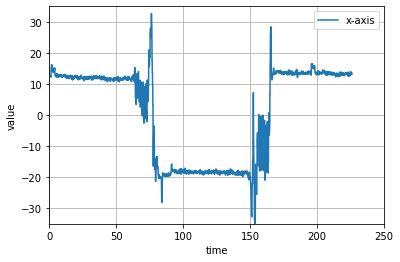

In [51]:
import os
import numpy as np
import matplotlib.pyplot as plt

base_dir = "..\\..\\..\\sensor_data"
# case = 1
num = 4
test_data = np.loadtxt(base_dir + "\\car3\\caradd" +"_" + str(num) + ".csv", delimiter=',', dtype=np.float32)
# title = "Magnetic sensor "

y1 = test_data[:, 10:11]

plt.axis([0, 250, -35, 35])

# plt.title(title)
x = test_data[:, 0:1]
plt.plot(x, y1, label="x-axis")

plt.grid()
plt.legend()
plt.xlabel("time")
plt.ylabel("value")

file_name = "car_svm.svg"
plt.savefig(file_name)

plt.show()

#### 2차 실험(Car in/out)

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt

def input_data_preprocessing(test_x, test_magno, filter, begin, end):
    val = test_magno[begin : end]
    val = np.ravel(val, order = 'C')
    val = val.reshape(1, filter)
    return val

def read_input(state_num):
    base_dir = os.getcwd()
    test_data = np.loadtxt("..\\..\\..\\sensor_data\\car3\\input_"+str(state_num)+'.csv', delimiter=',', dtype=np.float32)
    return test_data

def read_output(state_num):
    base_dir = os.getcwd()
    test_data = np.loadtxt("..\\..\\..\\sensor_data\\car3\\output_"+str(state_num)+'.csv', delimiter=',', dtype=np.float32)
    return test_data

In [53]:
state_num0 = 0
state_num1 = 1
state_num2 = 2
input_data0 = read_input(state_num0)
input_data1 = read_input(state_num1)
input_data2 = read_input(state_num2)

In [54]:
state_num0 = 0
state_num1 = 1
state_num2 = 2
output_data0 = read_output(state_num0)
output_data1 = read_output(state_num1)
output_data2= read_output(state_num2)

In [55]:
input_data = np.vstack([input_data0,input_data1])
input_data = np.vstack([input_data, input_data2])

In [56]:
input_data  = input_data[:,10:11]

In [57]:
input_data.shape

(12000, 1)

In [58]:
output_data = np.vstack([output_data0,output_data1])
output_data = np.vstack([output_data ,output_data2])

In [59]:
output_data.shape

(12000, 3)

In [60]:
input_data = input_data.reshape(2400,5,1)

In [61]:
output_data=output_data.reshape(2400,15)

In [62]:
output_data=output_data[:,12:15]

In [63]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.layers.convolutional import Conv1D
from keras.layers import GlobalAveragePooling1D
from keras.layers import MaxPooling1D


x_data, y_data = input_data, output_data

x_data = x_data.reshape(2400, 5, 1)  #넘파이행렬로 변환 : 행, 열, 1차원
#y_data = y_data.reshape(8995,51,1)
model = Sequential()
model.add(Conv1D(128,3,activation='relu', input_shape = (5,1), padding = 'same', strides = 1))
#필터갯수,필터크기,활성함수,(입력갯수=열,행), 패딩:same(입,출력 크기 동일)/valid(패딩x),stride(건너뛰기)
# model.add(Conv1D(128,3,activation='sigmoid'))
# model.add(MaxPooling1D(3))  #3칸마다 가장 큰 찾기
# model.add(Conv1D(64,3,activation='sigmoid'))
# model.add(Conv1D(64,3,activation='sigmoid'))
model.add(GlobalAveragePooling1D()) #각 차원마다 평균값 도출
model.add(Dropout(0.5)) #비활성화(0.1), 활성화(0.9)
model.add(Dense(3, activation = 'sigmoid')) #신경망비슷

epochs = 5000

model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
history = model.fit(x_data, y_data, batch_size = 100, epochs = epochs)

Epoch 1/5000
2400/2400 [==============================] - 0s 61us/step - loss: 0.5939 - accuracy: 0.7375
Epoch 2/5000
2400/2400 [==============================] - 0s 32us/step - loss: 0.4702 - accuracy: 0.7803
Epoch 3/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.4503 - accuracy: 0.7911
Epoch 4/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.4132 - accuracy: 0.8140
Epoch 5/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.3863 - accuracy: 0.8374
Epoch 6/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.3745 - accuracy: 0.8524
Epoch 7/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.3616 - accuracy: 0.8567
Epoch 8/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.3614 - accuracy: 0.8637
Epoch 9/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.3491 - accuracy: 0.8657
Epoch 10/5000
2400/2400 [==============================

2400/2400 [==============================] - 0s 33us/step - loss: 0.1836 - accuracy: 0.9346
Epoch 155/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1770 - accuracy: 0.9351
Epoch 156/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1709 - accuracy: 0.9390
Epoch 157/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1749 - accuracy: 0.9369
Epoch 158/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1691 - accuracy: 0.9404
Epoch 159/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1720 - accuracy: 0.9382
Epoch 160/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1676 - accuracy: 0.9408
Epoch 161/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1672 - accuracy: 0.9396
Epoch 162/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1627 - accuracy: 0.9396
Epoch 163/5000
2400/2400 [==========================

2400/2400 [==============================] - 0s 21us/step - loss: 0.1441 - accuracy: 0.9550
Epoch 307/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1528 - accuracy: 0.9503
Epoch 308/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1410 - accuracy: 0.9519
Epoch 309/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1505 - accuracy: 0.9524
Epoch 310/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1496 - accuracy: 0.9540
Epoch 311/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1452 - accuracy: 0.9526
Epoch 312/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1447 - accuracy: 0.9538
Epoch 313/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1465 - accuracy: 0.9522
Epoch 314/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1463 - accuracy: 0.9542
Epoch 315/5000
2400/2400 [==========================

2400/2400 [==============================] - 0s 20us/step - loss: 0.1388 - accuracy: 0.9568
Epoch 459/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1353 - accuracy: 0.9576
Epoch 460/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1378 - accuracy: 0.9585
Epoch 461/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1393 - accuracy: 0.9556
Epoch 462/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1327 - accuracy: 0.9585
Epoch 463/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1399 - accuracy: 0.9586
Epoch 464/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1414 - accuracy: 0.9567
Epoch 465/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1327 - accuracy: 0.9596
Epoch 466/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1352 - accuracy: 0.9568
Epoch 467/5000
2400/2400 [==========================

2400/2400 [==============================] - 0s 32us/step - loss: 0.1352 - accuracy: 0.9599
Epoch 611/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1305 - accuracy: 0.9601
Epoch 612/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1271 - accuracy: 0.9622
Epoch 613/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1332 - accuracy: 0.9592
Epoch 614/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1328 - accuracy: 0.9594
Epoch 615/5000
2400/2400 [==============================] - 0s 35us/step - loss: 0.1358 - accuracy: 0.9589
Epoch 616/5000
2400/2400 [==============================] - 0s 36us/step - loss: 0.1257 - accuracy: 0.9610
Epoch 617/5000
2400/2400 [==============================] - 0s 34us/step - loss: 0.1231 - accuracy: 0.9621
Epoch 618/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1329 - accuracy: 0.9601
Epoch 619/5000
2400/2400 [==========================

Epoch 686/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1297 - accuracy: 0.9599
Epoch 687/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1281 - accuracy: 0.9611
Epoch 688/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1299 - accuracy: 0.9603
Epoch 689/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1276 - accuracy: 0.9619
Epoch 690/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1281 - accuracy: 0.9621
Epoch 691/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1281 - accuracy: 0.9618
Epoch 692/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1302 - accuracy: 0.9626
Epoch 693/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1308 - accuracy: 0.9615
Epoch 694/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1369 - accuracy: 0.9601
Epoch 695/5000
2400/2400 [===========

2400/2400 [==============================] - 0s 21us/step - loss: 0.1254 - accuracy: 0.9650
Epoch 839/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1296 - accuracy: 0.9629
Epoch 840/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1185 - accuracy: 0.9640
Epoch 841/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1272 - accuracy: 0.9635
Epoch 842/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1283 - accuracy: 0.9619
Epoch 843/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1323 - accuracy: 0.9614
Epoch 844/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1216 - accuracy: 0.9626
Epoch 845/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1215 - accuracy: 0.9640
Epoch 846/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1248 - accuracy: 0.9640
Epoch 847/5000
2400/2400 [==========================

2400/2400 [==============================] - 0s 26us/step - loss: 0.1293 - accuracy: 0.9638
Epoch 991/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1318 - accuracy: 0.9628
Epoch 992/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1195 - accuracy: 0.9665
Epoch 993/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1275 - accuracy: 0.9622
Epoch 994/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1277 - accuracy: 0.9628
Epoch 995/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1210 - accuracy: 0.9628
Epoch 996/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1267 - accuracy: 0.9631
Epoch 997/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1239 - accuracy: 0.9653
Epoch 998/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1192 - accuracy: 0.9629
Epoch 999/5000
2400/2400 [==========================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1214 - accuracy: 0.9650
Epoch 1142/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1215 - accuracy: 0.9631
Epoch 1143/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1254 - accuracy: 0.9658
Epoch 1144/5000
2400/2400 [==============================] - 0s 34us/step - loss: 0.1247 - accuracy: 0.9644
Epoch 1145/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1206 - accuracy: 0.9638
Epoch 1146/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1217 - accuracy: 0.9632
Epoch 1147/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1228 - accuracy: 0.9624
Epoch 1148/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1191 - accuracy: 0.9639
Epoch 1149/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1307 - accuracy: 0.9635
Epoch 1150/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1247 - accuracy: 0.9656
Epoch 1218/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1226 - accuracy: 0.9665
Epoch 1219/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1141 - accuracy: 0.9649
Epoch 1220/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1203 - accuracy: 0.9650
Epoch 1221/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1193 - accuracy: 0.9660
Epoch 1222/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1169 - accuracy: 0.9635
Epoch 1223/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1242 - accuracy: 0.9654
Epoch 1224/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1210 - accuracy: 0.9650
Epoch 1225/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1309 - accuracy: 0.9617
Epoch 1226/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1242 - accuracy: 0.9656
Epoch 1294/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1205 - accuracy: 0.9649
Epoch 1295/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1295 - accuracy: 0.9625
Epoch 1296/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1209 - accuracy: 0.9649
Epoch 1297/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1192 - accuracy: 0.9664
Epoch 1298/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1257 - accuracy: 0.9644
Epoch 1299/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1182 - accuracy: 0.9654
Epoch 1300/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1194 - accuracy: 0.9649
Epoch 1301/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1243 - accuracy: 0.9651
Epoch 1302/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 21us/step - loss: 0.1214 - accuracy: 0.9642
Epoch 1370/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1248 - accuracy: 0.9650
Epoch 1371/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1145 - accuracy: 0.9664
Epoch 1372/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1201 - accuracy: 0.9642
Epoch 1373/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1208 - accuracy: 0.9644
Epoch 1374/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1157 - accuracy: 0.9675
Epoch 1375/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1197 - accuracy: 0.9644
Epoch 1376/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1237 - accuracy: 0.9632
Epoch 1377/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1182 - accuracy: 0.9679
Epoch 1378/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 21us/step - loss: 0.1211 - accuracy: 0.9664
Epoch 1446/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1209 - accuracy: 0.9651
Epoch 1447/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1185 - accuracy: 0.9651
Epoch 1448/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1186 - accuracy: 0.9662
Epoch 1449/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1149 - accuracy: 0.9651
Epoch 1450/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1272 - accuracy: 0.9635
Epoch 1451/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1279 - accuracy: 0.9625
Epoch 1452/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1210 - accuracy: 0.9636
Epoch 1453/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1269 - accuracy: 0.9644
Epoch 1454/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 25us/step - loss: 0.1210 - accuracy: 0.9658
Epoch 1522/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1143 - accuracy: 0.9681
Epoch 1523/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1099 - accuracy: 0.9658
Epoch 1524/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1134 - accuracy: 0.9644
Epoch 1525/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1268 - accuracy: 0.9674
Epoch 1526/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1189 - accuracy: 0.9661
Epoch 1527/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1275 - accuracy: 0.9651
Epoch 1528/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1182 - accuracy: 0.9649
Epoch 1529/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1211 - accuracy: 0.9653
Epoch 1530/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 33us/step - loss: 0.1160 - accuracy: 0.9669
Epoch 1598/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1165 - accuracy: 0.9665
Epoch 1599/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1153 - accuracy: 0.9628
Epoch 1600/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1145 - accuracy: 0.9664
Epoch 1601/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1186 - accuracy: 0.9658
Epoch 1602/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1156 - accuracy: 0.9647
Epoch 1603/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1185 - accuracy: 0.9654
Epoch 1604/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1146 - accuracy: 0.9638
Epoch 1605/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1217 - accuracy: 0.9654
Epoch 1606/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 33us/step - loss: 0.1295 - accuracy: 0.9647
Epoch 1674/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1236 - accuracy: 0.9647
Epoch 1675/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1179 - accuracy: 0.9660
Epoch 1676/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1226 - accuracy: 0.9653
Epoch 1677/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1212 - accuracy: 0.9661
Epoch 1678/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1213 - accuracy: 0.9640
Epoch 1679/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1293 - accuracy: 0.9650
Epoch 1680/5000
2400/2400 [==============================] - 0s 31us/step - loss: 0.1199 - accuracy: 0.9661
Epoch 1681/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1177 - accuracy: 0.9646
Epoch 1682/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 24us/step - loss: 0.1190 - accuracy: 0.9654
Epoch 1750/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1165 - accuracy: 0.9669
Epoch 1751/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1193 - accuracy: 0.9649
Epoch 1752/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1258 - accuracy: 0.9638
Epoch 1753/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1182 - accuracy: 0.9664
Epoch 1754/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1214 - accuracy: 0.9651
Epoch 1755/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1168 - accuracy: 0.9660
Epoch 1756/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1194 - accuracy: 0.9685
Epoch 1757/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1151 - accuracy: 0.9660
Epoch 1758/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 27us/step - loss: 0.1224 - accuracy: 0.9647
Epoch 1901/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1235 - accuracy: 0.9643
Epoch 1902/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1196 - accuracy: 0.9646
Epoch 1903/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1157 - accuracy: 0.9654
Epoch 1904/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1174 - accuracy: 0.9664
Epoch 1905/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1199 - accuracy: 0.9669
Epoch 1906/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1218 - accuracy: 0.9662
Epoch 1907/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1175 - accuracy: 0.9676
Epoch 1908/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1157 - accuracy: 0.9650
Epoch 1909/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 27us/step - loss: 0.1190 - accuracy: 0.9667
Epoch 1977/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1172 - accuracy: 0.9683
Epoch 1978/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1127 - accuracy: 0.9661
Epoch 1979/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1210 - accuracy: 0.9657
Epoch 1980/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1219 - accuracy: 0.9681
Epoch 1981/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1224 - accuracy: 0.9674
Epoch 1982/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1180 - accuracy: 0.9674
Epoch 1983/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1188 - accuracy: 0.9676
Epoch 1984/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1162 - accuracy: 0.9649
Epoch 1985/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 30us/step - loss: 0.1085 - accuracy: 0.9675
Epoch 2053/5000
2400/2400 [==============================] - 0s 32us/step - loss: 0.1179 - accuracy: 0.9654
Epoch 2054/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1133 - accuracy: 0.9689
Epoch 2055/5000
2400/2400 [==============================] - 0s 34us/step - loss: 0.1181 - accuracy: 0.9672
Epoch 2056/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1210 - accuracy: 0.9646
Epoch 2057/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1134 - accuracy: 0.9685
Epoch 2058/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1271 - accuracy: 0.9653
Epoch 2059/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1151 - accuracy: 0.9665
Epoch 2060/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1173 - accuracy: 0.9667
Epoch 2061/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 28us/step - loss: 0.1144 - accuracy: 0.9688
Epoch 2129/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1192 - accuracy: 0.9669
Epoch 2130/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1168 - accuracy: 0.9689
Epoch 2131/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1116 - accuracy: 0.9653
Epoch 2132/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1130 - accuracy: 0.9672
Epoch 2133/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1146 - accuracy: 0.9694
Epoch 2134/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1207 - accuracy: 0.9672
Epoch 2135/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1210 - accuracy: 0.9654
Epoch 2136/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1078 - accuracy: 0.9708
Epoch 2137/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 31us/step - loss: 0.1169 - accuracy: 0.9669
Epoch 2280/5000
2400/2400 [==============================] - 0s 36us/step - loss: 0.1170 - accuracy: 0.9660
Epoch 2281/5000
2400/2400 [==============================] - 0s 32us/step - loss: 0.1137 - accuracy: 0.9669
Epoch 2282/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1115 - accuracy: 0.9686
Epoch 2283/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1202 - accuracy: 0.9682
Epoch 2284/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1251 - accuracy: 0.9671
Epoch 2285/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1253 - accuracy: 0.9664
Epoch 2286/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1153 - accuracy: 0.9665
Epoch 2287/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1238 - accuracy: 0.9681
Epoch 2288/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 33us/step - loss: 0.1072 - accuracy: 0.9690
Epoch 2356/5000
2400/2400 [==============================] - 0s 31us/step - loss: 0.1229 - accuracy: 0.9651
Epoch 2357/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1199 - accuracy: 0.9672
Epoch 2358/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1140 - accuracy: 0.9686
Epoch 2359/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1246 - accuracy: 0.9672
Epoch 2360/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1107 - accuracy: 0.9668
Epoch 2361/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1202 - accuracy: 0.9660
Epoch 2362/5000
2400/2400 [==============================] - 0s 33us/step - loss: 0.1132 - accuracy: 0.9667
Epoch 2363/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1209 - accuracy: 0.9658
Epoch 2364/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 30us/step - loss: 0.1153 - accuracy: 0.9688
Epoch 2432/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1166 - accuracy: 0.9669
Epoch 2433/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1095 - accuracy: 0.9696
Epoch 2434/5000
2400/2400 [==============================] - 0s 38us/step - loss: 0.1178 - accuracy: 0.9675
Epoch 2435/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1174 - accuracy: 0.9682
Epoch 2436/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1178 - accuracy: 0.9660
Epoch 2437/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1107 - accuracy: 0.9686
Epoch 2438/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1166 - accuracy: 0.9668
Epoch 2439/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1180 - accuracy: 0.9683
Epoch 2440/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 25us/step - loss: 0.1146 - accuracy: 0.9654
Epoch 2508/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1198 - accuracy: 0.9665
Epoch 2509/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1151 - accuracy: 0.9674
Epoch 2510/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1174 - accuracy: 0.9692
Epoch 2511/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1199 - accuracy: 0.9662
Epoch 2512/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1097 - accuracy: 0.9676
Epoch 2513/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1176 - accuracy: 0.9635
Epoch 2514/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1124 - accuracy: 0.9696
Epoch 2515/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1190 - accuracy: 0.9657
Epoch 2516/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 25us/step - loss: 0.1196 - accuracy: 0.9674
Epoch 2584/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1198 - accuracy: 0.9669
Epoch 2585/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1166 - accuracy: 0.9661
Epoch 2586/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1119 - accuracy: 0.9688
Epoch 2587/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1106 - accuracy: 0.9682
Epoch 2588/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1153 - accuracy: 0.9663
Epoch 2589/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1224 - accuracy: 0.9658
Epoch 2590/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1212 - accuracy: 0.9651
Epoch 2591/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1140 - accuracy: 0.9675
Epoch 2592/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 28us/step - loss: 0.1150 - accuracy: 0.9657
Epoch 2660/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1259 - accuracy: 0.9651
Epoch 2661/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1202 - accuracy: 0.9683
Epoch 2662/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1267 - accuracy: 0.9643
Epoch 2663/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1242 - accuracy: 0.9694
Epoch 2664/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1265 - accuracy: 0.9643
Epoch 2665/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1171 - accuracy: 0.9693
Epoch 2666/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1195 - accuracy: 0.9658
Epoch 2667/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1140 - accuracy: 0.9690
Epoch 2668/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1065 - accuracy: 0.9689
Epoch 2736/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1119 - accuracy: 0.9681
Epoch 2737/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1259 - accuracy: 0.9681
Epoch 2738/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1152 - accuracy: 0.9675
Epoch 2739/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1244 - accuracy: 0.9664
Epoch 2740/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1276 - accuracy: 0.9685
Epoch 2741/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1225 - accuracy: 0.9682
Epoch 2742/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1230 - accuracy: 0.9664
Epoch 2743/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1267 - accuracy: 0.9660
Epoch 2744/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1175 - accuracy: 0.9696
Epoch 2812/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1260 - accuracy: 0.9674
Epoch 2813/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1145 - accuracy: 0.9667
Epoch 2814/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1230 - accuracy: 0.9657
Epoch 2815/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1176 - accuracy: 0.9676
Epoch 2816/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1122 - accuracy: 0.9689
Epoch 2817/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1132 - accuracy: 0.9692
Epoch 2818/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1289 - accuracy: 0.9650
Epoch 2819/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1134 - accuracy: 0.9690
Epoch 2820/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1100 - accuracy: 0.9688
Epoch 2888/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1239 - accuracy: 0.9675
Epoch 2889/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1183 - accuracy: 0.9689
Epoch 2890/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1207 - accuracy: 0.9651
Epoch 2891/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1235 - accuracy: 0.9650
Epoch 2892/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1135 - accuracy: 0.9661
Epoch 2893/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1115 - accuracy: 0.9689
Epoch 2894/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1189 - accuracy: 0.9664
Epoch 2895/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1225 - accuracy: 0.9675
Epoch 2896/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1249 - accuracy: 0.9663
Epoch 2964/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1123 - accuracy: 0.9692
Epoch 2965/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1319 - accuracy: 0.9661
Epoch 2966/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1096 - accuracy: 0.9676
Epoch 2967/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1116 - accuracy: 0.9668
Epoch 2968/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1141 - accuracy: 0.9665
Epoch 2969/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1225 - accuracy: 0.9683
Epoch 2970/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1069 - accuracy: 0.9697
Epoch 2971/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1104 - accuracy: 0.9689
Epoch 2972/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 26us/step - loss: 0.1081 - accuracy: 0.9699
Epoch 3040/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1193 - accuracy: 0.9697
Epoch 3041/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1115 - accuracy: 0.9688
Epoch 3042/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1185 - accuracy: 0.9668
Epoch 3043/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1134 - accuracy: 0.9692
Epoch 3044/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1181 - accuracy: 0.9660
Epoch 3045/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1174 - accuracy: 0.9643
Epoch 3046/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1177 - accuracy: 0.9651
Epoch 3047/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1218 - accuracy: 0.9674
Epoch 3048/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 26us/step - loss: 0.1130 - accuracy: 0.9681
Epoch 3116/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1140 - accuracy: 0.9679
Epoch 3117/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1231 - accuracy: 0.9676
Epoch 3118/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1204 - accuracy: 0.9689
Epoch 3119/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1208 - accuracy: 0.9664
Epoch 3120/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1087 - accuracy: 0.9714
Epoch 3121/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1159 - accuracy: 0.9692
Epoch 3122/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1141 - accuracy: 0.9674
Epoch 3123/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1177 - accuracy: 0.9669
Epoch 3124/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 38us/step - loss: 0.1205 - accuracy: 0.9672
Epoch 3192/5000
2400/2400 [==============================] - 0s 34us/step - loss: 0.1141 - accuracy: 0.9689
Epoch 3193/5000
2400/2400 [==============================] - 0s 34us/step - loss: 0.1195 - accuracy: 0.9675
Epoch 3194/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1142 - accuracy: 0.9660
Epoch 3195/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1163 - accuracy: 0.9669
Epoch 3196/5000
2400/2400 [==============================] - 0s 31us/step - loss: 0.1069 - accuracy: 0.9692
Epoch 3197/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1295 - accuracy: 0.9658
Epoch 3198/5000
2400/2400 [==============================] - 0s 41us/step - loss: 0.1152 - accuracy: 0.9685
Epoch 3199/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1248 - accuracy: 0.9675
Epoch 3200/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1093 - accuracy: 0.9678
Epoch 3342/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1144 - accuracy: 0.9681
Epoch 3343/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1147 - accuracy: 0.9682
Epoch 3344/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1242 - accuracy: 0.9676
Epoch 3345/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1138 - accuracy: 0.9685
Epoch 3346/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1169 - accuracy: 0.9679
Epoch 3347/5000
2400/2400 [==============================] - 0s 50us/step - loss: 0.1263 - accuracy: 0.9654
Epoch 3348/5000
2400/2400 [==============================] - 0s 36us/step - loss: 0.1135 - accuracy: 0.9661
Epoch 3349/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1084 - accuracy: 0.9690
Epoch 3350/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 21us/step - loss: 0.1239 - accuracy: 0.9675
Epoch 3418/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1192 - accuracy: 0.9682
Epoch 3419/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1271 - accuracy: 0.9668
Epoch 3420/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1129 - accuracy: 0.9692
Epoch 3421/5000
2400/2400 [==============================] - 0s 20us/step - loss: 0.1261 - accuracy: 0.9649
Epoch 3422/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1219 - accuracy: 0.9690
Epoch 3423/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1215 - accuracy: 0.9667
Epoch 3424/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1214 - accuracy: 0.9661
Epoch 3425/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1161 - accuracy: 0.9685
Epoch 3426/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 21us/step - loss: 0.1280 - accuracy: 0.9661
Epoch 3494/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1130 - accuracy: 0.9671
Epoch 3495/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1219 - accuracy: 0.9639
Epoch 3496/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1153 - accuracy: 0.9668
Epoch 3497/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1148 - accuracy: 0.9687
Epoch 3498/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1151 - accuracy: 0.9664
Epoch 3499/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1210 - accuracy: 0.9686
Epoch 3500/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1206 - accuracy: 0.9675
Epoch 3501/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1222 - accuracy: 0.9686
Epoch 3502/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 22us/step - loss: 0.1190 - accuracy: 0.9683
Epoch 3570/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1123 - accuracy: 0.9682
Epoch 3571/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1181 - accuracy: 0.9681
Epoch 3572/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1128 - accuracy: 0.9681
Epoch 3573/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1078 - accuracy: 0.9697
Epoch 3574/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1302 - accuracy: 0.9675
Epoch 3575/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1159 - accuracy: 0.9686
Epoch 3576/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1176 - accuracy: 0.9689
Epoch 3577/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1256 - accuracy: 0.9674
Epoch 3578/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 26us/step - loss: 0.1228 - accuracy: 0.9674
Epoch 3721/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1197 - accuracy: 0.9667
Epoch 3722/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1133 - accuracy: 0.9678
Epoch 3723/5000
2400/2400 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.98 - 0s 22us/step - loss: 0.1169 - accuracy: 0.9706
Epoch 3724/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1093 - accuracy: 0.9699
Epoch 3725/5000
2400/2400 [==============================] - 0s 22us/step - loss: 0.1151 - accuracy: 0.9688
Epoch 3726/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1149 - accuracy: 0.9688
Epoch 3727/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1082 - accuracy: 0.9697
Epoch 3728/5000
2400/2400 [==============================] - 0s 21us/step - loss: 0.1116 - accuracy: 0.9675
Ep

2400/2400 [==============================] - 0s 26us/step - loss: 0.1066 - accuracy: 0.9703
Epoch 3872/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1080 - accuracy: 0.9686
Epoch 3873/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1166 - accuracy: 0.9676
Epoch 3874/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1084 - accuracy: 0.9707
Epoch 3875/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1221 - accuracy: 0.9676
Epoch 3876/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1215 - accuracy: 0.9665
Epoch 3877/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1156 - accuracy: 0.9675
Epoch 3878/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1091 - accuracy: 0.9714
Epoch 3879/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1202 - accuracy: 0.9681
Epoch 3880/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 26us/step - loss: 0.1049 - accuracy: 0.9703
Epoch 3948/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1136 - accuracy: 0.9686
Epoch 3949/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1221 - accuracy: 0.9656
Epoch 3950/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1113 - accuracy: 0.9676
Epoch 3951/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1193 - accuracy: 0.9693
Epoch 3952/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1185 - accuracy: 0.9672
Epoch 3953/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1191 - accuracy: 0.9676
Epoch 3954/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1187 - accuracy: 0.9681
Epoch 3955/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1084 - accuracy: 0.9683
Epoch 3956/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 26us/step - loss: 0.1161 - accuracy: 0.9669
Epoch 4024/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1160 - accuracy: 0.9676
Epoch 4025/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1163 - accuracy: 0.9676
Epoch 4026/5000
2400/2400 [==============================] - 0s 24us/step - loss: 0.1160 - accuracy: 0.9685
Epoch 4027/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1233 - accuracy: 0.9664
Epoch 4028/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1114 - accuracy: 0.9700
Epoch 4029/5000
2400/2400 [==============================] - 0s 23us/step - loss: 0.1151 - accuracy: 0.9699
Epoch 4030/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1161 - accuracy: 0.9692
Epoch 4031/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1049 - accuracy: 0.9697
Epoch 4032/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 27us/step - loss: 0.1153 - accuracy: 0.9696
Epoch 4100/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1182 - accuracy: 0.9669
Epoch 4101/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1179 - accuracy: 0.9688
Epoch 4102/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1112 - accuracy: 0.9692
Epoch 4103/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1237 - accuracy: 0.9651
Epoch 4104/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1186 - accuracy: 0.9679
Epoch 4105/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1218 - accuracy: 0.9686
Epoch 4106/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1171 - accuracy: 0.9656
Epoch 4107/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1146 - accuracy: 0.9664
Epoch 4108/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 27us/step - loss: 0.1258 - accuracy: 0.9671
Epoch 4176/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1141 - accuracy: 0.9689
Epoch 4177/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1190 - accuracy: 0.9690
Epoch 4178/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1212 - accuracy: 0.9674
Epoch 4179/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1100 - accuracy: 0.9693
Epoch 4180/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1200 - accuracy: 0.9667
Epoch 4181/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1166 - accuracy: 0.9699
Epoch 4182/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1196 - accuracy: 0.9672
Epoch 4183/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1181 - accuracy: 0.9672
Epoch 4184/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 28us/step - loss: 0.1189 - accuracy: 0.9682
Epoch 4252/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1262 - accuracy: 0.9653
Epoch 4253/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1183 - accuracy: 0.9654
Epoch 4254/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1171 - accuracy: 0.9692
Epoch 4255/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1187 - accuracy: 0.9678
Epoch 4256/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1163 - accuracy: 0.9682
Epoch 4257/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1137 - accuracy: 0.9668
Epoch 4258/5000
2400/2400 [==============================] - 0s 28us/step - loss: 0.1102 - accuracy: 0.9681
Epoch 4259/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1131 - accuracy: 0.9671
Epoch 4260/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 38us/step - loss: 0.1147 - accuracy: 0.9679
Epoch 4402/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1177 - accuracy: 0.9688
Epoch 4403/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1134 - accuracy: 0.9683
Epoch 4404/5000
2400/2400 [==============================] - 0s 34us/step - loss: 0.1081 - accuracy: 0.9710
Epoch 4405/5000
2400/2400 [==============================] - 0s 29us/step - loss: 0.1132 - accuracy: 0.9699
Epoch 4406/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1102 - accuracy: 0.9689
Epoch 4407/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1175 - accuracy: 0.9682
Epoch 4408/5000
2400/2400 [==============================] - 0s 35us/step - loss: 0.1133 - accuracy: 0.9690
Epoch 4409/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1132 - accuracy: 0.9703
Epoch 4410/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 34us/step - loss: 0.1212 - accuracy: 0.9664
Epoch 4478/5000
2400/2400 [==============================] - 0s 45us/step - loss: 0.1192 - accuracy: 0.9685
Epoch 4479/5000
2400/2400 [==============================] - 0s 43us/step - loss: 0.1213 - accuracy: 0.9688
Epoch 4480/5000
2400/2400 [==============================] - 0s 32us/step - loss: 0.1190 - accuracy: 0.9668
Epoch 4481/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1176 - accuracy: 0.9696
Epoch 4482/5000
2400/2400 [==============================] - 0s 36us/step - loss: 0.1124 - accuracy: 0.9690
Epoch 4483/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1161 - accuracy: 0.9700
Epoch 4484/5000
2400/2400 [==============================] - 0s 33us/step - loss: 0.1127 - accuracy: 0.9693
Epoch 4485/5000
2400/2400 [==============================] - 0s 30us/step - loss: 0.1232 - accuracy: 0.9661
Epoch 4486/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 37us/step - loss: 0.1204 - accuracy: 0.9682
Epoch 4628/5000
2400/2400 [==============================] - 0s 43us/step - loss: 0.1205 - accuracy: 0.9683
Epoch 4629/5000
2400/2400 [==============================] - 0s 43us/step - loss: 0.1083 - accuracy: 0.9710
Epoch 4630/5000
2400/2400 [==============================] - 0s 39us/step - loss: 0.1137 - accuracy: 0.9686
Epoch 4631/5000
2400/2400 [==============================] - 0s 46us/step - loss: 0.1145 - accuracy: 0.9683
Epoch 4632/5000
2400/2400 [==============================] - 0s 42us/step - loss: 0.1177 - accuracy: 0.9675
Epoch 4633/5000
2400/2400 [==============================] - 0s 40us/step - loss: 0.1053 - accuracy: 0.9697
Epoch 4634/5000
2400/2400 [==============================] - 0s 42us/step - loss: 0.1091 - accuracy: 0.9688
Epoch 4635/5000
2400/2400 [==============================] - 0s 45us/step - loss: 0.1143 - accuracy: 0.9696
Epoch 4636/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 32us/step - loss: 0.1187 - accuracy: 0.9663
Epoch 4704/5000
2400/2400 [==============================] - 0s 36us/step - loss: 0.1175 - accuracy: 0.9689
Epoch 4705/5000
2400/2400 [==============================] - 0s 37us/step - loss: 0.1248 - accuracy: 0.9679
Epoch 4706/5000
2400/2400 [==============================] - 0s 32us/step - loss: 0.1205 - accuracy: 0.9682
Epoch 4707/5000
2400/2400 [==============================] - 0s 34us/step - loss: 0.1180 - accuracy: 0.9671
Epoch 4708/5000
2400/2400 [==============================] - 0s 35us/step - loss: 0.1143 - accuracy: 0.9682
Epoch 4709/5000
2400/2400 [==============================] - 0s 36us/step - loss: 0.1144 - accuracy: 0.9692
Epoch 4710/5000
2400/2400 [==============================] - 0s 35us/step - loss: 0.1145 - accuracy: 0.9679
Epoch 4711/5000
2400/2400 [==============================] - 0s 35us/step - loss: 0.1145 - accuracy: 0.9699
Epoch 4712/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 35us/step - loss: 0.1137 - accuracy: 0.9682
Epoch 4780/5000
2400/2400 [==============================] - 0s 44us/step - loss: 0.1177 - accuracy: 0.9663
Epoch 4781/5000
2400/2400 [==============================] - 0s 38us/step - loss: 0.1177 - accuracy: 0.9683
Epoch 4782/5000
2400/2400 [==============================] - 0s 34us/step - loss: 0.1145 - accuracy: 0.9665
Epoch 4783/5000
2400/2400 [==============================] - 0s 37us/step - loss: 0.1147 - accuracy: 0.9692
Epoch 4784/5000
2400/2400 [==============================] - 0s 41us/step - loss: 0.1176 - accuracy: 0.9679
Epoch 4785/5000
2400/2400 [==============================] - 0s 38us/step - loss: 0.1103 - accuracy: 0.9690
Epoch 4786/5000
2400/2400 [==============================] - 0s 33us/step - loss: 0.1194 - accuracy: 0.9660
Epoch 4787/5000
2400/2400 [==============================] - 0s 33us/step - loss: 0.1117 - accuracy: 0.9690
Epoch 4788/5000
2400/2400 [=================

2400/2400 [==============================] - 0s 30us/step - loss: 0.1224 - accuracy: 0.9674
Epoch 4856/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1170 - accuracy: 0.9681
Epoch 4857/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1141 - accuracy: 0.9671
Epoch 4858/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1155 - accuracy: 0.9690
Epoch 4859/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1173 - accuracy: 0.9697
Epoch 4860/5000
2400/2400 [==============================] - 0s 25us/step - loss: 0.1171 - accuracy: 0.9679
Epoch 4861/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1147 - accuracy: 0.9685
Epoch 4862/5000
2400/2400 [==============================] - 0s 26us/step - loss: 0.1210 - accuracy: 0.9682
Epoch 4863/5000
2400/2400 [==============================] - 0s 27us/step - loss: 0.1211 - accuracy: 0.9668
Epoch 4864/5000
2400/2400 [=================

In [64]:
history.history['accuracy']

[0.73749995,
 0.78027785,
 0.7911112,
 0.8140278,
 0.83736116,
 0.852361,
 0.8566667,
 0.86375,
 0.86569446,
 0.87513894,
 0.87291664,
 0.8829167,
 0.87694436,
 0.87666667,
 0.8816668,
 0.875,
 0.89013886,
 0.88541675,
 0.8883333,
 0.8888888,
 0.8925,
 0.88875,
 0.88638896,
 0.89194447,
 0.8930555,
 0.895,
 0.89041656,
 0.89583325,
 0.8959722,
 0.8999999,
 0.895,
 0.90125,
 0.8931944,
 0.8990277,
 0.8984723,
 0.8916666,
 0.8963888,
 0.9022222,
 0.90333325,
 0.9027779,
 0.9012499,
 0.9086111,
 0.90458333,
 0.90430564,
 0.8998613,
 0.9058333,
 0.9034722,
 0.90458333,
 0.9055556,
 0.90555555,
 0.91,
 0.9059723,
 0.91111106,
 0.90736127,
 0.9086111,
 0.9109722,
 0.91291654,
 0.90569437,
 0.9120833,
 0.91583335,
 0.9077779,
 0.91138893,
 0.9106945,
 0.9172222,
 0.91263884,
 0.91236115,
 0.9140279,
 0.9184722,
 0.91958344,
 0.91569436,
 0.9200001,
 0.9193056,
 0.9175001,
 0.9212499,
 0.91666675,
 0.9215278,
 0.91680545,
 0.9240278,
 0.92055565,
 0.9183334,
 0.9197222,
 0.9218056,
 0.9184723,

In [65]:
accuracy = np.array(history.history['accuracy'])

In [66]:
accuracy.shape

(5000,)

In [67]:
acc = accuracy.reshape(5000,1)

In [68]:
acc.shape

(5000, 1)

In [69]:
def divide_acc(data):
    new_data = []
    for i in range(0,5000):
        if i%100==0:
            new_data.append(data[i:i+1, 0])
    return new_data

def xdata_gen(num):
    new_data = []
    for i in range(0,5000):
        if i%100==0:
            new_data.append(i)
    return new_data

In [70]:
y = divide_acc(acc)

In [71]:
y = np.array(y)

In [72]:
x = xdata_gen(5000)

In [73]:
x = np.array(x)
x = x.reshape(50,1)

In [74]:
x.shape

(50, 1)

In [75]:
y.shape

(50, 1)

In [76]:
file_name = "C:\\Users\\Desktop\\car_svm.svg"

No handles with labels found to put in legend.


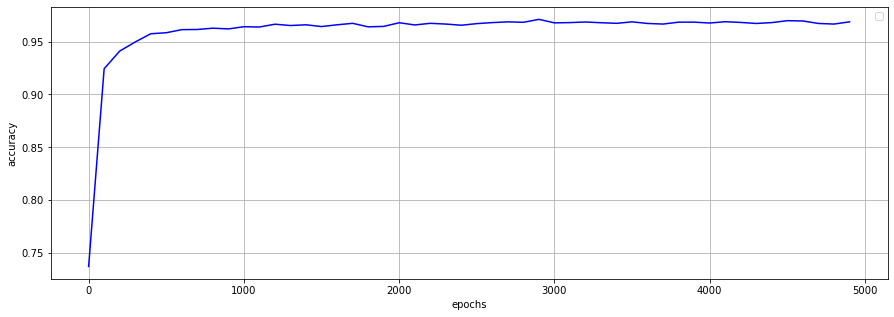

In [77]:
# y_vloss = history.history['val_loss']
# y_loss = history.history['acc']
# x_len = np.arange(len(y_loss))

y_loss = y
x_len  = x
plt.figure(figsize=(15, 5))

# plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
# plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, y_loss, 'b')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epochs')
# plt.ylabel('loss')
plt.ylabel('accuracy')
plt.savefig(file_name)

plt.show()